In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
from helpers import *
from utils import *
path_dataset = 'train.csv'
y, X, ids = load_csv_data(path_dataset)
y[np.where(y == -1)] = 0

In [3]:
X.shape

(250000, 30)

In [4]:
y.shape

(250000,)

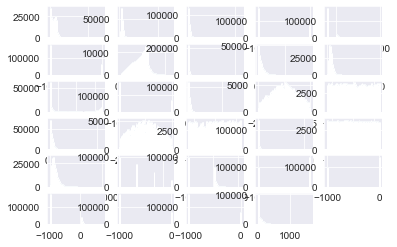

In [5]:
N_feature = X.shape[1]
for i in range(1, N_feature):
    plt.subplot(6,5,i)
    plt.hist(X[:,i], bins = 70)

In [50]:
def removeOutliers(x):
    p75, p25 = np.percentile(x[(x != -999)], [95, 5])
    iqr = p75 - p25
    low = p25 - 1.5 * iqr
    high = p75 + 1.5 * iqr
    print(low,high)
    mask1 = (x < high) & (x>low)
    mask2 = (x == -999)
    return mask1|mask2

In [32]:
X_train,X_test,y_train,y_test = split_data(X, y, 0.8)
print("Training data shapes", X_train.shape, y_train.shape)
print("Validation data shapes", X_test.shape, y_test.shape)

Training data shapes (200000, 30) (200000,)
Validation data shapes (50000, 30) (50000,)


<AxesSubplot:>

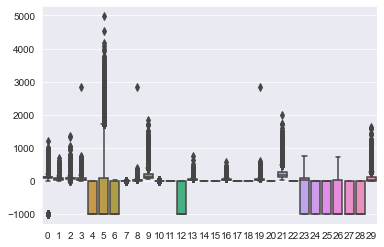

In [36]:
sns.boxplot(X_train)

In [51]:
X_train_ro=X_train.copy()
y_train_ro = y_train.copy()
outliers_map = np.ones(X_train.shape,dtype=bool)

for i in range(X_train.shape[1]):
    outliers_map[:,i] = removeOutliers(X_train_ro[:,i])
    # X_train_ro=X_train_ro[map]
    # print(X_train_ro.shape)
    # y_train_ro=y_train_ro[map]
    # print(y_train_ro.shape)
outliers_map = (np.sum(outliers_map,axis=1) == 30)
X_train_ro=X_train_ro[outliers_map]
y_train_ro=y_train_ro[outliers_map]
print("Training data shapes", X_train_ro.shape, y_train_ro.shape)

-159.23774999999998 438.15104999999994
-148.49357499999996 256.46262499999995
-129.19999999999987 316.36519999999985
-272.2681249999997 456.9908749999995
-7.9235 13.6965
-1636.37915 2873.29525
-25.626 23.006
-2.7256249999999986 7.142574999999999
-83.04114999999996 140.35124999999994
-433.85862499999973 872.4123749999995
-3.124 6.508
-5.650500000000001 5.649500000000001
-1.4925 2.4875
-64.86907499999998 163.55512499999998
-8.041574999999982 8.04262499999997
-11.310000000000002 11.314000000000002
-61.916799999999924 175.7519999999999
-8.2845 8.2795
-11.3385 11.3375
-128.83767499999985 237.13212499999975
-11.309500000000002 11.302500000000002
-503.91907499999996 1021.5023249999999
-4.5 7.5
-223.18400000000003 458.392
-11.697 11.687000000000001
-11.294500000000001 11.293500000000002
-96.25094999999999 243.80224999999996
-13.09847499999999 13.068124999999984
-11.3015 11.310500000000001
-395.1397499999995 658.5662499999992
Training data shapes (196491, 30) (196491,)


In [53]:
from utils import *
X_train_ro=X_train.copy()
y_train_ro = y_train.copy()
X_train_ro,y_train_ro=remove_outliers(X_train,y_train)
print("Training data shapes", X_train_ro.shape, y_train_ro.shape)

-159.23774999999998 438.15104999999994
-148.49357499999996 256.46262499999995
-129.19999999999987 316.36519999999985
-272.2681249999997 456.9908749999995
-7.9235 13.6965
-1636.37915 2873.29525
-25.626 23.006
-2.7256249999999986 7.142574999999999
-83.04114999999996 140.35124999999994
-433.85862499999973 872.4123749999995
-3.124 6.508
-5.650500000000001 5.649500000000001
-1.4925 2.4875
-64.86907499999998 163.55512499999998
-8.041574999999982 8.04262499999997
-11.310000000000002 11.314000000000002
-61.916799999999924 175.7519999999999
-8.2845 8.2795
-11.3385 11.3375
-128.83767499999985 237.13212499999975
-11.309500000000002 11.302500000000002
-503.91907499999996 1021.5023249999999
-4.5 7.5
-223.18400000000003 458.392
-11.697 11.687000000000001
-11.294500000000001 11.293500000000002
-96.25094999999999 243.80224999999996
-13.09847499999999 13.068124999999984
-11.3015 11.310500000000001
-395.1397499999995 658.5662499999992
Training data shapes (196491, 30) (196491,)


<AxesSubplot:>

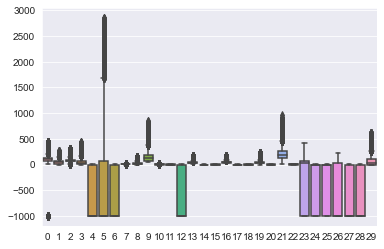

In [37]:
sns.boxplot(X_train_ro)

In [11]:
X_train, _, _ = standardize(X_train)
X_train.shape

(167500, 30)

In [12]:
X_train_ro, _, _ = standardize(X_train_ro)
X_train.shape

(167500, 30)

In [40]:
X_train.shape

(200000, 30)

In [41]:
X_train_ro.shape

(196137, 30)

In [14]:
from implementations import *
weights, loss = logistic_regression(y_train, X_train, np.random.random(X_train.shape[1]), max_iters=1000, gamma=0.01)
loss

SGD iteration 0/999: loss=2.475556624439492, w=[0.8651617  0.65851884 0.79159446 0.37884573 0.67521157 0.89770509
 0.01243366 0.3602702  0.40537207 0.91216694 0.4554874  0.63471436
 0.85742243 0.32374477 0.96080032 0.70407138 0.14339045 0.04508767
 0.53971859 0.37100167 0.46237549 0.89595827 0.33261946 0.50482429
 0.00995351 0.66654162 0.56354029 0.76264378 0.96155439 0.74822575]
SGD iteration 1/999: loss=2.456969983870294, w=[0.86472032 0.65817469 0.7912416  0.37853101 0.67638425 0.89887777
 0.01360634 0.36001629 0.40511993 0.91175713 0.45523563 0.63446255
 0.85859511 0.32345401 0.96054846 0.70381915 0.14308823 0.04483427
 0.53947002 0.37069937 0.46212373 0.89546803 0.33236809 0.50450756
 0.00970347 0.66629494 0.56471296 0.76381646 0.96272706 0.74790902]
SGD iteration 2/999: loss=2.4603913698161635, w=[0.85807096 0.65352731 0.78534546 0.37392679 0.67229113 0.89027967
 0.00957772 0.35590284 0.4005625  0.90318332 0.45115342 0.63044844
 0.85452632 0.31878091 0.9565465  0.69984084 0.13805

0.6176798645151861

In [15]:
weights, loss = reg_logistic_regression(y_train, X_train, 0.1,np.random.random(X_train.shape[1]), max_iters=1000, gamma=0.01)
loss

SGD iteration 0/999: loss=2.0500211624280675, w=[0.34210332 0.21709019 0.59847092 0.88188774 0.17551802 0.18630386
 0.56843726 0.30892941 0.67261795 0.00864925 0.66402767 0.00519125
 0.65696424 0.73719716 0.23604308 0.73215946 0.20208876 0.50121409
 0.39338071 0.43072187 0.9981025  0.19885079 0.26483877 0.74984674
 0.24166165 0.67605773 0.96438517 0.50209938 0.45704671 0.96705824]
SGD iteration 1/999: loss=1.9859554305431832, w=[0.34048803 0.21599732 0.59676595 0.88007754 0.17894683 0.18972188
 0.57147314 0.30783924 0.67105237 0.00729322 0.66258898 0.00442395
 0.6599116  0.73555399 0.2350489  0.7306532  0.20091635 0.49995306
 0.39222783 0.4294088  0.99634173 0.19693078 0.26380131 0.74808934
 0.24064121 0.6746049  0.96702511 0.5052016  0.46019399 0.96508363]
SGD iteration 2/999: loss=1.9923429510367892, w=[0.33938495 0.21482486 0.59541524 0.87829284 0.18196154 0.19272582
 0.57409533 0.30684889 0.66968234 0.00606309 0.66124315 0.00374038
 0.66244536 0.73394109 0.23414096 0.72923953 0.199

0.6618884706476262

In [16]:
weights, loss = logistic_regression(y_train_ro, X_train_ro, np.random.random(X_train.shape[1]), max_iters=1000, gamma=0.01)
loss

SGD iteration 0/999: loss=1.5672426224167433, w=[0.61717642 0.74380187 0.05647969 0.54849968 0.60962577 0.5112233
 0.18403941 0.01184092 0.94178113 0.68491798 0.11436581 0.0740989
 0.24225139 0.27716878 0.86248323 0.31107545 0.76656443 0.50235095
 0.89175152 0.75637263 0.35029056 0.81359954 0.74310015 0.1928736
 0.69736996 0.54923343 0.91460235 0.25095494 0.00801134 0.89509251]
SGD iteration 1/999: loss=1.5672434598347278, w=[0.6144443  0.74114201 0.05384254 0.54605378 0.61639602 0.51799355
 0.19080966 0.0096176  0.93933523 0.68215133 0.11214157 0.07190468
 0.24902163 0.27477133 0.86027288 0.30889197 0.76398841 0.50013635
 0.88955212 0.75398141 0.34807227 0.81063283 0.74089332 0.19964385
 0.70414021 0.55600367 0.9213726  0.25772518 0.01478158 0.89288568]
SGD iteration 2/999: loss=1.5419000241832357, w=[0.6192504  0.74461552 0.05826185 0.5495353  0.60579275 0.50739028
 0.18020639 0.01311838 0.94281675 0.68656001 0.11560846 0.07538082
 0.23841837 0.27877006 0.86373998 0.31231485 0.767854

0.7433257772954541

In [17]:
X_train_ro, _, _ = standardize(X_train_ro)
weights, loss = reg_logistic_regression(y_train_ro, X_train_ro, 0.01, np.random.random(X_train.shape[1]), max_iters=1000, gamma=0.01)
loss

SGD iteration 0/999: loss=1.576927212545223, w=[0.79704484 0.88582235 0.97619055 0.39089983 0.63094388 0.81340901
 0.21396622 0.34487499 0.25907523 0.53698691 0.39972773 0.81680968
 0.90009534 0.88852311 0.08850385 0.13369377 0.53434114 0.62188365
 0.77205525 0.33612876 0.27490748 0.30471412 0.58670938 0.8371179
 0.88959623 0.49155428 0.57984408 0.78113728 0.38233367 0.8573734 ]
SGD iteration 1/999: loss=1.5646620417012134, w=[0.79687122 0.88565583 0.97600513 0.39078907 0.63109491 0.8135418
 0.21415895 0.34476987 0.25897765 0.53684638 0.39961759 0.81665859
 0.90021946 0.88835708 0.0884251  0.13360975 0.53420826 0.62175178
 0.7719082  0.33602358 0.27481093 0.30457934 0.58658092 0.83724831
 0.8897214  0.49171925 0.58000022 0.78127329 0.38250957 0.85721787]
SGD iteration 2/999: loss=1.5648327268289606, w=[0.79085953 0.88118212 0.97061975 0.3853205  0.64336178 0.82579042
 0.2264675  0.34068275 0.25450196 0.53039379 0.39554178 0.81253498
 0.91245941 0.88361791 0.08439761 0.12960353 0.529489

0.6632247506814902

In [ ]:
X_b_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_b_test = np.hstack((X_test,np.ones((X_test.shape[0],1))))



In [ ]:
Phi_train = np.hstack((X_train,X_train**2))
Phi_test = np.hstack((X_test,X_test**2))
Phi_b_train = np.hstack((Phi_train,np.ones((Phi_train.shape[0],1))))
Phi_b_test = np.hstack((Phi_test,np.ones((Phi_test.shape[0],1))))
print(Phi_train.shape)
print(Phi_train.shape)

# SKlearn Test

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_train, y_train))
accuracy_score(y_test, clf.predict(X_test))

0.7385134328358209


/Users/alexzhu/opt/anaconda3/envs/myepfl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7389333333333333

In [35]:
clf = LogisticRegression(random_state=0).fit(X_train_ro, y_train_ro)
print(clf.score(X_train_ro, y_train_ro))
accuracy_score(y_test, clf.predict(X_test))

0.7403192666350561


/Users/alexzhu/opt/anaconda3/envs/myepfl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7413